<a href="https://colab.research.google.com/github/GDurgaGowri/Stock-Prediction-Tesla/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!https://www.kaggle.com/datasets/willianoliveiragibin/stock-tesla/data

/bin/bash: line 1: https://www.kaggle.com/datasets/willianoliveiragibin/stock-tesla/data: No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

df=pd.read_csv('/content/stock_tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/12/2023,103.00,111.75,101.81,108.10,"101,077,602"
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906"
2,12/08/2023,110.35,114.59,107.16,110.34,"101,543,297"
3,12/07/2023,110.51,116.27,107.52,112.71,"101,596,305"
4,12/06/2023,116.55,118.80,108.24,113.06,"101,752,898"


In [ ]:
df.shape

(252, 6)

In [ ]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [ ]:
df.tail()


,Date,Open,High,Low,Close,Volume
247,12/16/2022,278.82,284.25,276.31,281.38,"98,595,328"
248,12/15/2022,279.56,285.30,277.60,282.48,"98,654,641"
249,12/14/2022,286.63,292.23,283.57,290.38,"99,038,641"
250,12/13/2022,290.15,295.26,286.01,291.26,"99,539,914"
251,12/12/2022,296.04,299.29,289.52,293.34,"99,777,430"


In [ ]:
# Data Exploration and Preprocessing
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for January 2023 to December 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df = df.sort_values(by='Date')

In [ ]:
df['next_day_close']=df['Close'].shift(-1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,next_day_close
237,2023-01-03,272.38,276.71,266.37,271.30,"95,108,484",269.79
236,2023-01-04,271.32,276.52,265.10,269.79,"94,881,172",269.61
235,2023-01-05,271.16,274.98,265.00,269.61,"93,562,914",269.06
234,2023-01-06,270.76,274.85,263.78,269.06,"92,067,023",267.48
233,2023-01-09,270.07,274.75,263.76,267.48,"91,972,359",267.43


In [ ]:
# Handle SettingWithCopyWarning
df = df.copy()

# Convert 'Close' column to string, remove commas, and convert to numeric
df['Close'] = pd.to_numeric(df['Close'].astype(str).str.replace(',', ''), errors='coerce')


In [ ]:
# Convert 'Volume' to Numeric
df['Volume'] = df['Volume'].astype(str).str.replace(',', '').astype(float)

In [ ]:
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target='next_day_close'

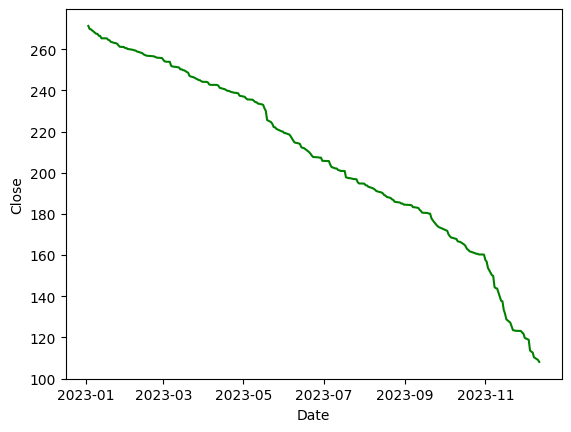

In [ ]:
plt.plot(df.Date, df.Close,  color='green')
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()


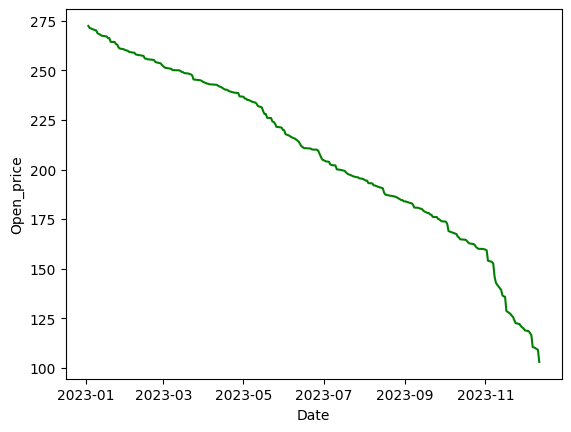

In [ ]:
plt.plot(df.Date, df.Open,  color='green')
plt.xlabel("Date")
plt.ylabel("Open_price")
plt.show()

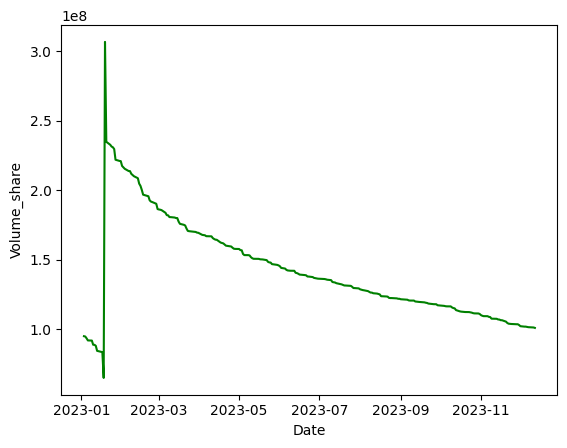

In [ ]:
plt.plot(df.Date, df.Volume,  color='green')
plt.xlabel("Date")
plt.ylabel("Volume_share")
plt.show()

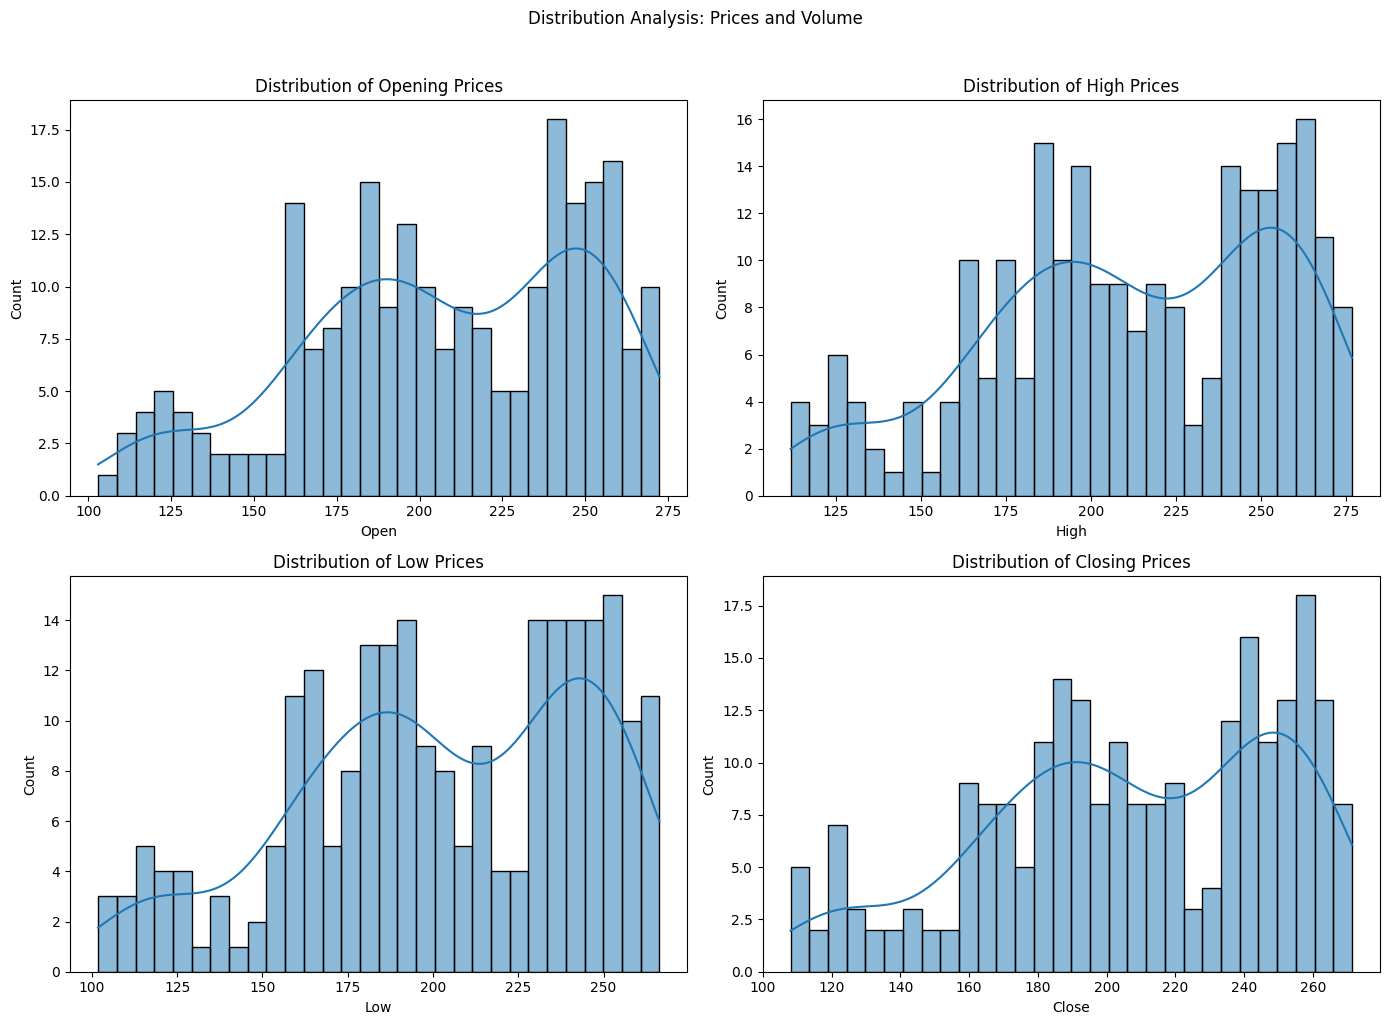

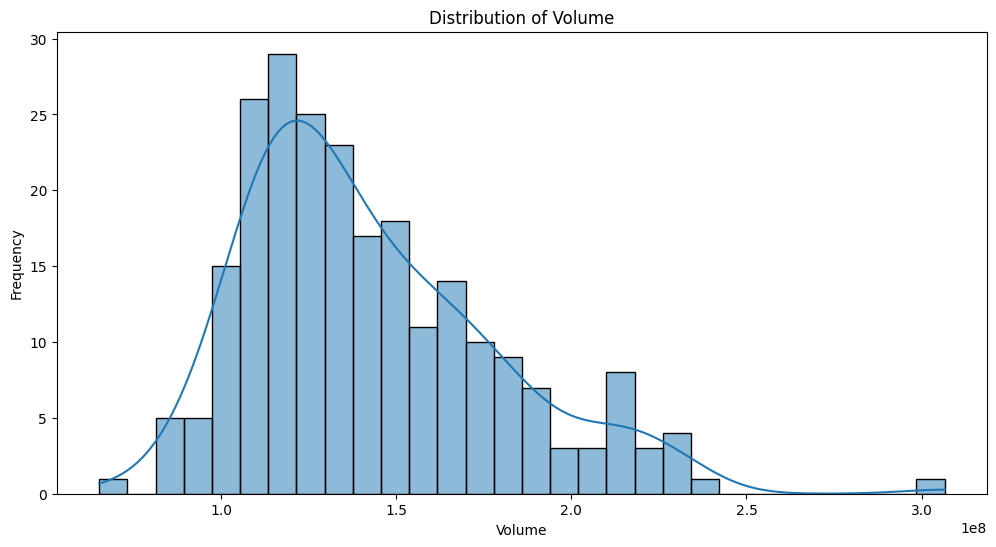

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution Analysis: Prices and Volume', y=1.02)

# Histogram for Opening Price
sns.histplot(df['Open'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Opening Prices')

# Histogram for High Price
sns.histplot(df['High'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of High Prices')

# Histogram for Low Price
sns.histplot(df['Low'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Low Prices')

# Histogram for Closing Price
sns.histplot(df['Close'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Closing Prices')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

# Histogram for Volume
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=30, kde=True)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

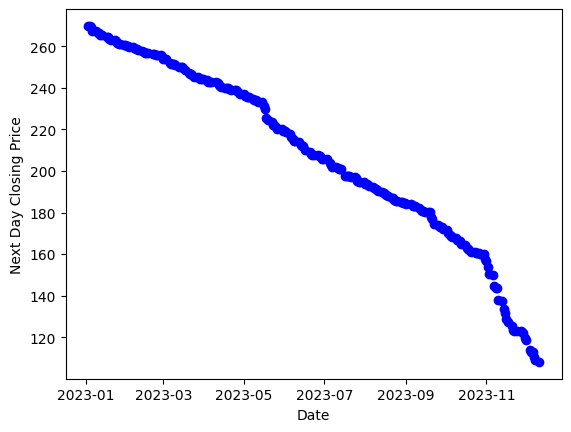

In [ ]:
plt.scatter(df.Date,df.next_day_close,color="blue")
plt.xlabel("Date")
plt.ylabel("Next Day Closing Price")
plt.show()

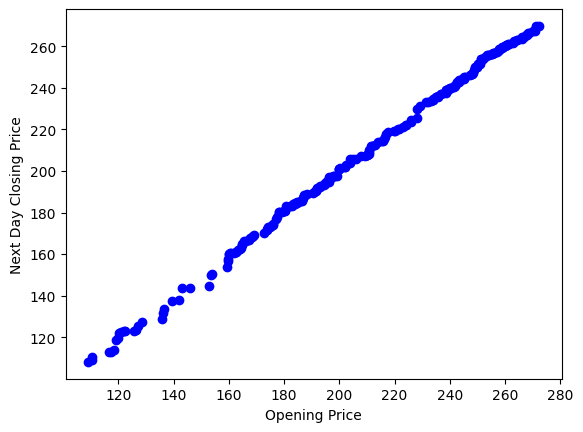

In [ ]:
plt.scatter(df.Open,df.next_day_close,color="blue")
plt.xlabel("Opening Price")
plt.ylabel("Next Day Closing Price")
plt.show()

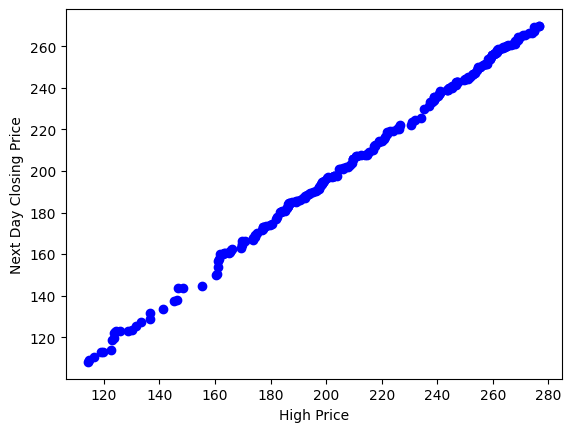

In [ ]:
plt.scatter(df.High,df.next_day_close,color="blue")
plt.xlabel("High Price")
plt.ylabel("Next Day Closing Price")
plt.show()

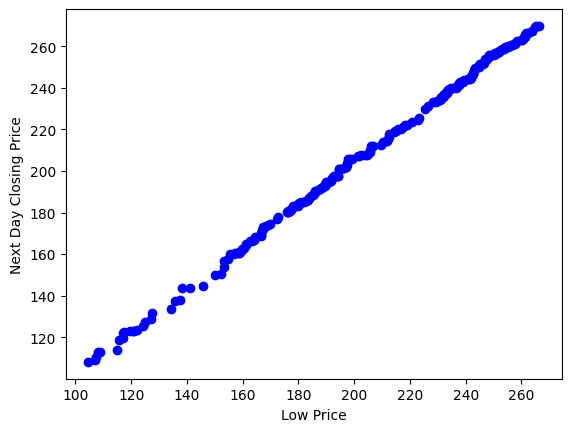

In [ ]:
plt.scatter(df.Low,df.next_day_close,color="blue")
plt.xlabel("Low Price")
plt.ylabel("Next Day Closing Price")
plt.show()

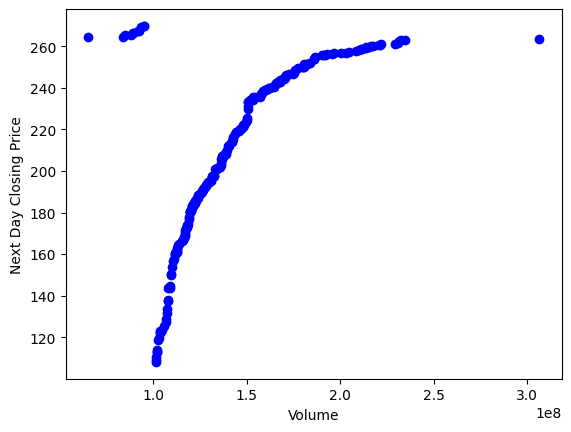

In [ ]:
plt.scatter(df.Volume,df.next_day_close,color="blue")
plt.xlabel("Volume")
plt.ylabel("Next Day Closing Price")
plt.show()

In [ ]:
ms = np.random.rand(len(df))<0.8
train = df[ms]
test = df[~ms]

In [ ]:
train['next_day_close'].fillna(train['next_day_close'].median(), inplace=True)
test['next_day_close'].fillna(test['next_day_close'].median(), inplace=True)

<ipython-input-235-afb999d85d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['next_day_close'].fillna(train['next_day_close'].median(), inplace=True)
<ipython-input-235-afb999d85d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['next_day_close'].fillna(test['next_day_close'].median(), inplace=True)


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train[['Volume']])
train_y=np.asanyarray(train[['next_day_close']])
reg.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[8.04400305e-07]]
Intercept:  [92.67821601]


Text(0, 0.5, 'Next Day Closing Price')

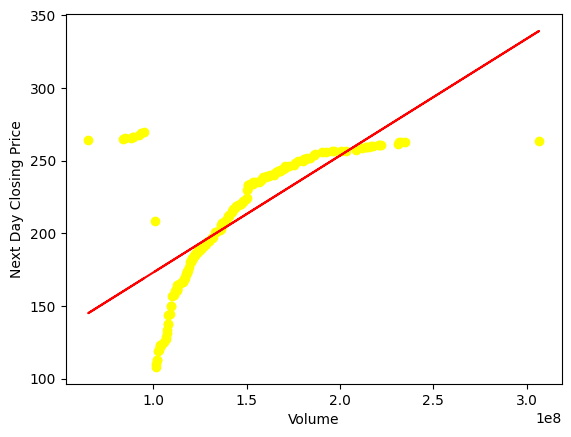

In [ ]:
plt.scatter(train.Volume, train.next_day_close,  color='yellow')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Volume")
plt.ylabel("Next Day Closing Price")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Volume']])
test_y = np.asanyarray(test[['next_day_close']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 17.03
Residual sum of squares (MSE): 827.51
R2-score: 0.51


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train[['Open']])
train_y=np.asanyarray(train[['next_day_close']])
reg.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[0.97860565]]
Intercept:  [4.47090219]


Text(0, 0.5, 'Next Day Closing Price')

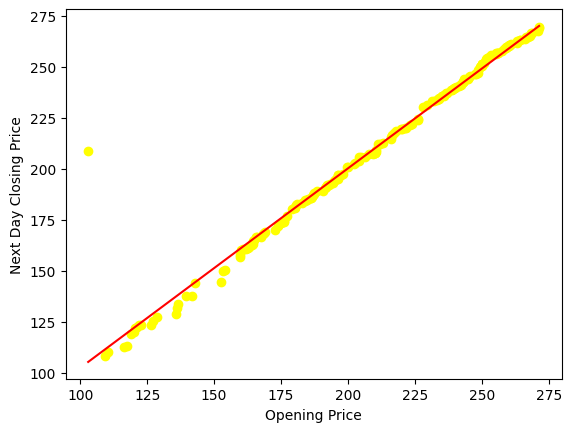

In [ ]:
plt.scatter(train.Open, train.next_day_close,  color='yellow')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Opening Price")
plt.ylabel("Next Day Closing Price")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['next_day_close']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.48
Residual sum of squares (MSE): 4.47
R2-score: 1.00


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train[['High']])
train_y=np.asanyarray(train[['next_day_close']])
reg.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[0.97021031]]
Intercept:  [1.85119238]


Text(0, 0.5, 'Next Day Closing Price')

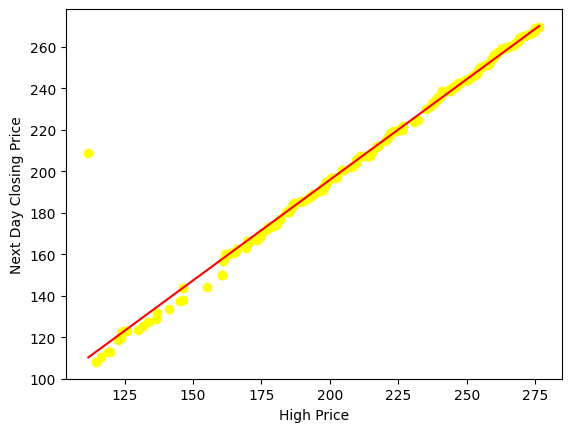

In [ ]:
plt.scatter(train.High, train.next_day_close,  color='yellow')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("High Price")
plt.ylabel("Next Day Closing Price")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['High']])
test_y = np.asanyarray(test[['next_day_close']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.50
Residual sum of squares (MSE): 4.17
R2-score: 1.00


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train[['Low']])
train_y=np.asanyarray(train[['next_day_close']])
reg.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[0.98545529]]
Intercept:  [7.5251666]


Text(0, 0.5, 'Next Day Closing Price')

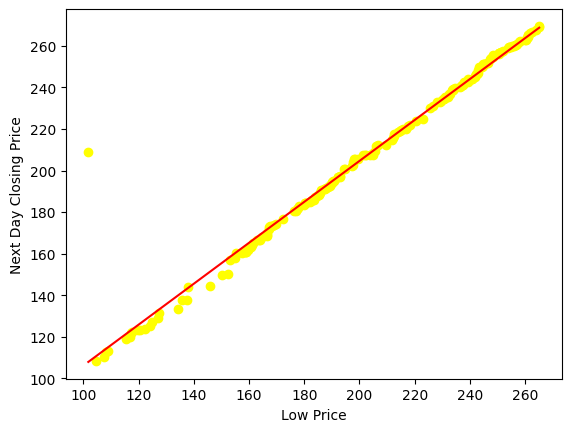

In [ ]:
plt.scatter(train.Low, train.next_day_close,  color='yellow')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Low Price")
plt.ylabel("Next Day Closing Price")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Low']])
test_y = np.asanyarray(test[['next_day_close']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.37
Residual sum of squares (MSE): 3.74
R2-score: 1.00


In [ ]:
new_data = pd.DataFrame({ 'Open': [110.51]})
new_features = new_data[['Open']]
predicted_close = reg.predict(new_features)
print(f"Predicted Close Price: {predicted_close[0]}")

Predicted Close Price: [116.42783116]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
new_data = pd.DataFrame({ 'High': [116.27]})
new_features = new_data[['High']]
predicted_close = reg.predict(new_features)
print(f"Predicted Close Price: {predicted_close[0]}")

Predicted Close Price: [122.10405365]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
new_data = pd.DataFrame({ 'Low': [107.52]})
new_features = new_data[['Low']]
predicted_close = reg.predict(new_features)
print(f"Predicted Close Price: {predicted_close[0]}")

Predicted Close Price: [113.48131983]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
new_data = pd.DataFrame({ 'Close': [112.71]})
new_features = new_data[['Close']]
predicted_close = reg.predict(new_features)
print(f"Predicted Close Price: {predicted_close[0]}")

Predicted Close Price: [118.5958328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
